Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from glob import glob


In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [ ]:
## Unzip the file in google drive
# !unzip gdrive/MyDrive/CNN\ assignment

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               batch_size = batch_size, 
                                                               image_size = (img_height,img_width),
                                                               seed = 123,
                                                               validation_split = 0.2,
                                                               subset = 'training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               batch_size = batch_size, 
                                                               image_size = (img_height,img_width),
                                                               seed = 123,
                                                               validation_split = 0.2,
                                                               subset = 'validation')


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

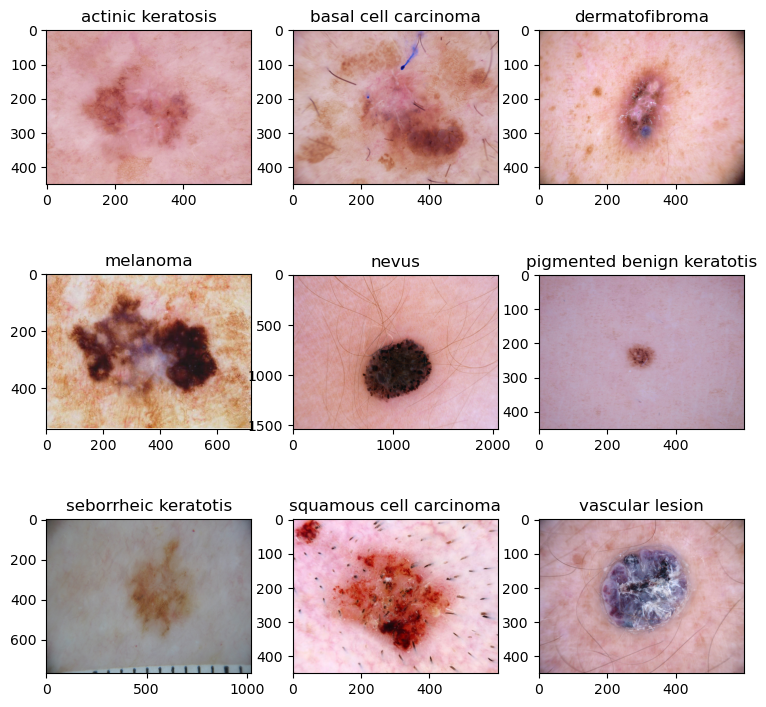

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
plt.figure(figsize=(9,9))
plt.subplot(3,3,1)
plt.imshow(image.load_img(str(data_dir_train)+'/actinic keratosis/ISIC_0025957.jpg'))
plt.title('actinic keratosis')
plt.subplot(3,3,2)
plt.imshow(image.load_img(str(data_dir_train)+'/basal cell carcinoma/ISIC_0024515.jpg'))
plt.title('basal cell carcinoma')
plt.subplot(3,3,3)
plt.imshow(image.load_img(str(data_dir_train)+'/dermatofibroma/ISIC_0027008.jpg'))
plt.title('dermatofibroma')
plt.subplot(3,3,4)
plt.imshow(image.load_img(str(data_dir_train)+'/melanoma/ISIC_0000173.jpg'))
plt.title('melanoma')
plt.subplot(3,3,5)
plt.imshow(image.load_img(str(data_dir_train)+'/nevus/ISIC_0000084.jpg'))
plt.title('nevus')
plt.subplot(3,3,6)
plt.imshow(image.load_img(str(data_dir_train)+'/pigmented benign keratosis/ISIC_0024883.jpg'))
plt.title('pigmented benign keratotis')
plt.subplot(3,3,7)
plt.imshow(image.load_img(str(data_dir_train)+'/seborrheic keratosis/ISIC_0011118.jpg'))
plt.title('seborrheic keratotis')
plt.subplot(3,3,8)
plt.imshow(image.load_img(str(data_dir_train)+'/squamous cell carcinoma/ISIC_0025948.jpg'))
plt.title('squamous cell carcinoma')
plt.subplot(3,3,9)
plt.imshow(image.load_img(str(data_dir_train)+'/vascular lesion/ISIC_0032557.jpg'))
plt.title('vascular lesion')
plt.show()
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
### Your code goes here
model = Sequential([
    layers.experimental.preprocessing.Rescaling(scale=1./255, offset = 0.0, input_shape = (img_height, img_width,3)),
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(9, activation= 'softmax')
                    
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [11]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 12s 155ms/step - loss: 2.1296 - accuracy: 0.2249 - val_loss: 1.8746 - val_accuracy: 0.3065
Epoch 2/20
56/56 [==============================] - 8s 135ms/step - loss: 1.7311 - accuracy: 0.3655 - val_loss: 1.7217 - val_accuracy: 0.3490
Epoch 3/20
56/56 [==============================] - 8s 137ms/step - loss: 1.4526 - accuracy: 0.4883 - val_loss: 1.4451 - val_accuracy: 0.5145
Epoch 4/20
56/56 [==============================] - 8s 136ms/step - loss: 1.3253 - accuracy: 0.5285 - val_loss: 1.3676 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 8s 138ms/step - loss: 1.2692 - accuracy: 0.5586 - val_loss: 1.3796 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 8s 145ms/step - loss: 1.1498 - accuracy: 0.5971 - val_loss: 1.4194 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 8s 147ms/step - loss: 1.0946 - accuracy: 0.6116 - val_loss: 1.4839 - val_accuracy: 0.5213
Epoch

### Visualizing training results

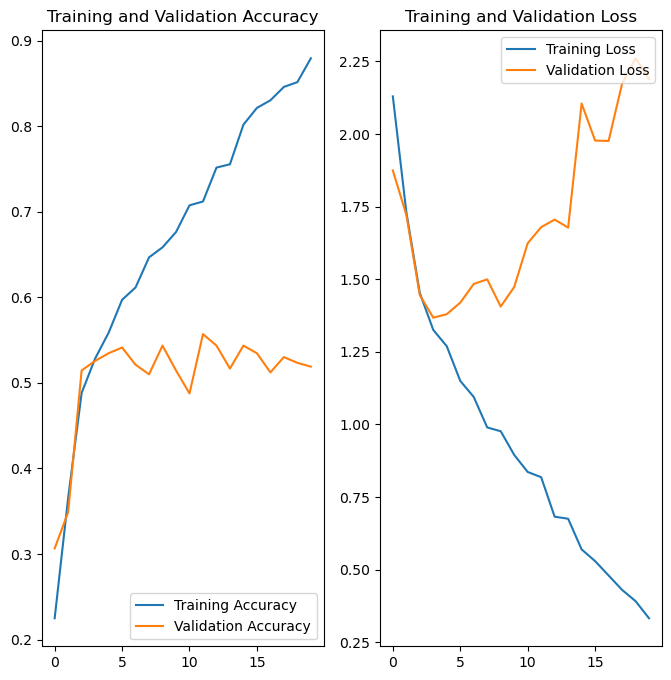

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Oberservations
- Train accuracy is increasing linearly and validation accuracy is varying around 50%
- There is overfitting of the model as the difference between training and validation is large.
- Overall we can conclude that training and validation accuracy differ by large value and model achieves only 52% accuracy on validation set.

### Write your findings here

In [15]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape = (img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])


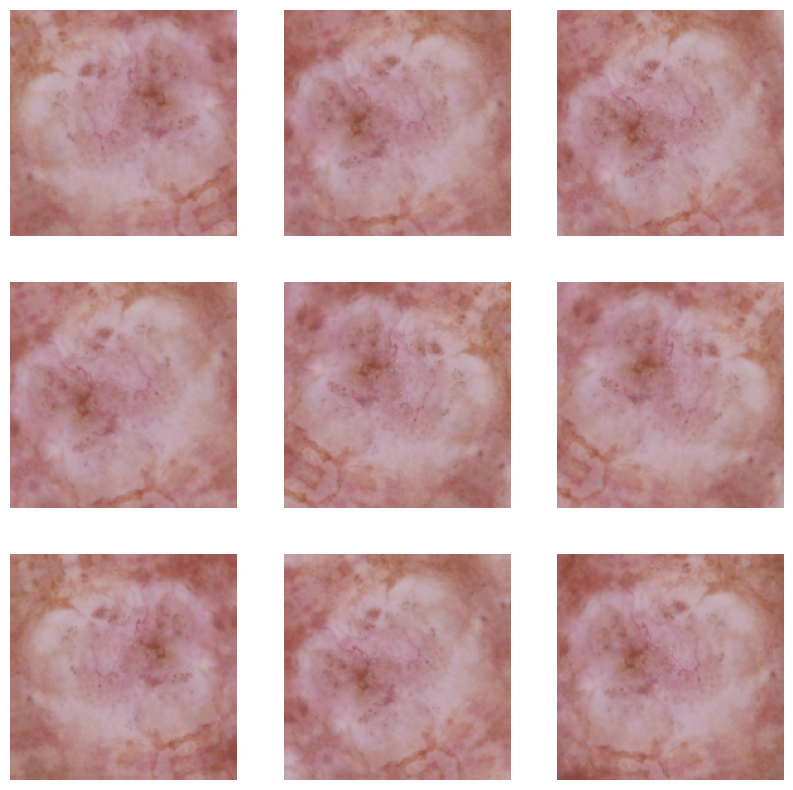

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [17]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

model = Sequential([
  layers.experimental.preprocessing.Rescaling(scale = 1./255,offset=0.0,input_shape = (img_height,img_width,3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9, activation='softmax')
  ])



### Compiling the model

In [18]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [19]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 9s 156ms/step - loss: 1.8388 - accuracy: 0.3265 - val_loss: 1.7443 - val_accuracy: 0.3512
Epoch 2/20
56/56 [==============================] - 8s 146ms/step - loss: 1.6078 - accuracy: 0.4258 - val_loss: 1.4945 - val_accuracy: 0.4922
Epoch 3/20
56/56 [==============================] - 8s 149ms/step - loss: 1.4920 - accuracy: 0.4788 - val_loss: 1.4464 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 8s 149ms/step - loss: 1.3772 - accuracy: 0.5279 - val_loss: 1.4024 - val_accuracy: 0.5459
Epoch 5/20
56/56 [==============================] - 8s 151ms/step - loss: 1.3337 - accuracy: 0.5128 - val_loss: 1.4956 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 8s 150ms/step - loss: 1.3156 - accuracy: 0.5385 - val_loss: 1.3463 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 8s 151ms/step - loss: 1.2861 - accuracy: 0.5352 - val_loss: 1.3500 - val_accuracy: 0.5257
Epoch 

### Visualizing the results

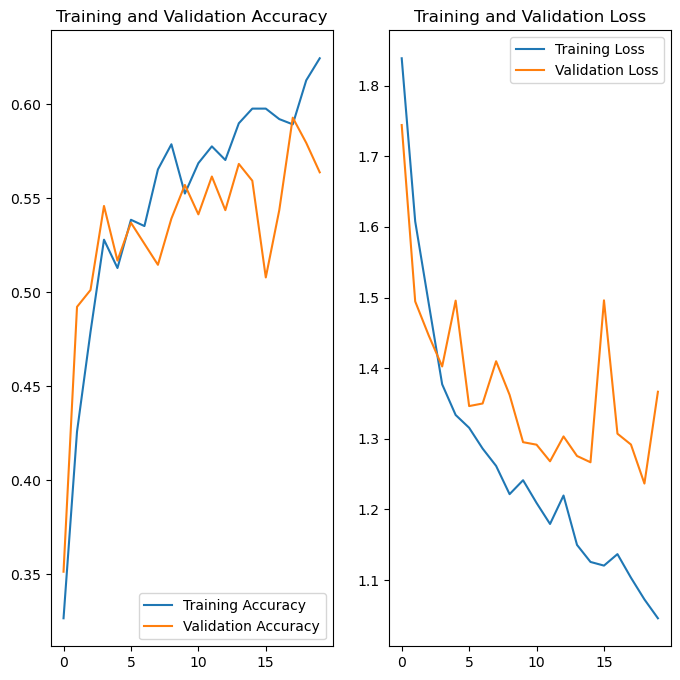

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

 ### Observation
 - Model performance has not increased compared to pervious model. Training and validation accuracy is varying around 55-60%

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [21]:
## Your code goes here.
path_list= [x for x in glob(os.path.join(data_dir_train,'*/*.jpg'))]
lesion_list= [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*/*.jpg'))]
dataframe_dict= dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [22]:
original_df.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,melanoma
1,Skin cancer ISIC The International Skin Imagin...,melanoma
2,Skin cancer ISIC The International Skin Imagin...,melanoma
3,Skin cancer ISIC The International Skin Imagin...,melanoma
4,Skin cancer ISIC The International Skin Imagin...,melanoma


In [23]:
original_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

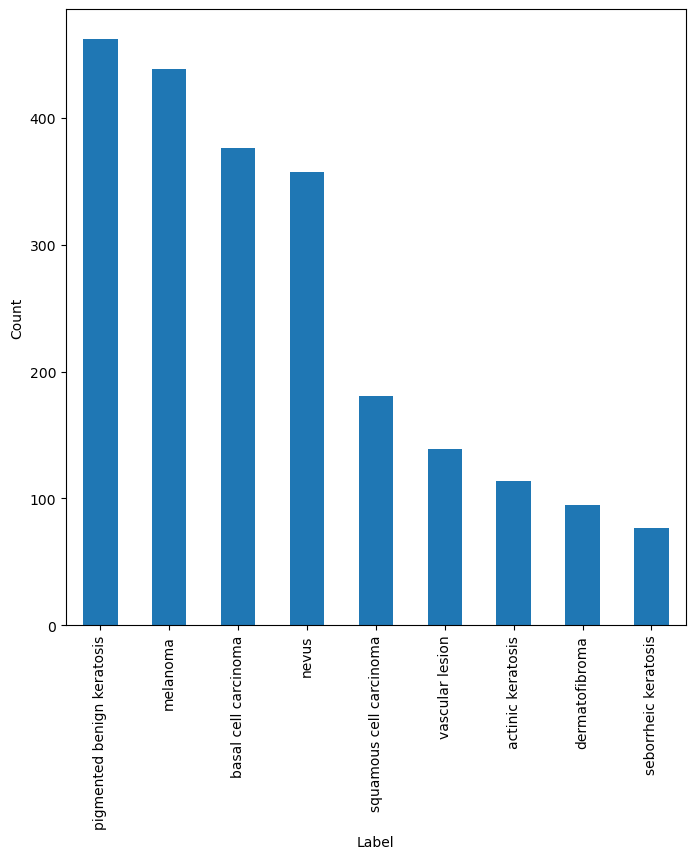

In [24]:
plt.figure(figsize = (8,8))
original_df['Label'].value_counts().plot.bar()
plt.ylabel('Count')
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
       - Seborrheic keratosis has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
       - Pigmented benign keratosis dominates in terms of number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset= data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) +'/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x167DC5650>: 100%|██████████| 500/500 [00:02<00:00, 243.49 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x167E58190>: 100%|██████████| 500/500 [00:01<00:00, 262.29 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x167F17F10>: 100%|██████████| 500/500 [00:02<00:00, 229.22 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1679D2CD0>: 100%|██████████| 500/500 [00:08<00:00, 55.73 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x167FA6750>: 100%|██████████| 500/500 [00:08<00:00, 55.58 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x167F80410>: 100%|██████████| 500/500 [00:02<00:00, 239.15 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1679FDAD0>: 100%|██████████| 500/500 [00:04<00:00, 107.02 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x167D20690>: 100%|██████████| 500/500 [00:02<00:00, 237.43 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1679D9550>: 100%|██████████| 500/500 [00:02<00:00, 234.18 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0009905.jpg_bcc09d3e-d93b-4a41-b372-aad46c500805.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010559.jpg_8a88341d-31e5-41c9-b33b-624ff8caa1d1.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000549.jpg_32ebd88a-1f48-4ec1-be19-7c4b9cd06678.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010993.jpg_43dfd9a7-4a1c-475a-ba5a-b239332358f5.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000412.jpg_515f0fd5-f9d3-45c0-8fa1-6565307db716.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000521.jpg_496ccd62-22c3-464b-b3fd-d66fefe7be6c.jpg',
 'Skin cancer IS

In [29]:
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [30]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [31]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [32]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    924
melanoma                      876
basal cell carcinoma          752
nevus                         714
squamous cell carcinoma       362
vascular lesion               278
actinic keratosis             228
dermatofibroma                190
seborrheic keratosis          154
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [34]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
## your code goes here
model = Sequential([
  layers.experimental.preprocessing.Rescaling(scale = 1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9, activation='softmax')
  ])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [38]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 28s 162ms/step - loss: 1.8270 - accuracy: 0.3034 - val_loss: 1.5115 - val_accuracy: 0.4388
Epoch 2/30
169/169 [==============================] - 28s 163ms/step - loss: 1.3977 - accuracy: 0.4803 - val_loss: 1.3809 - val_accuracy: 0.4937
Epoch 3/30
169/169 [==============================] - 29s 167ms/step - loss: 1.1726 - accuracy: 0.5675 - val_loss: 1.1783 - val_accuracy: 0.5746
Epoch 4/30
169/169 [==============================] - 29s 169ms/step - loss: 1.0159 - accuracy: 0.6324 - val_loss: 1.0578 - val_accuracy: 0.6266
Epoch 5/30
169/169 [==============================] - 31s 179ms/step - loss: 0.8318 - accuracy: 0.7077 - val_loss: 1.1129 - val_accuracy: 0.6140
Epoch 6/30
169/169 [==============================] - 31s 182ms/step - loss: 0.7213 - accuracy: 0.7446 - val_loss: 0.8894 - val_accuracy: 0.6897
Epoch 7/30
169/169 [==============================] - 30s 172ms/step - loss: 0.5799 - accuracy: 0.7999 - val_loss: 0.8170 - val_ac

#### **Todo:**  Visualize the model results

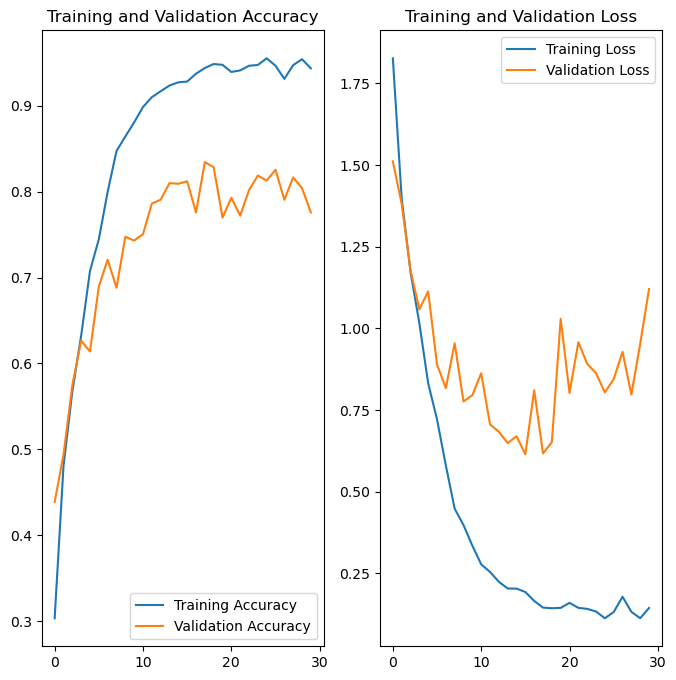

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Observation
- Class rebalance reduces overfitting to a large extent.
- Both training and validation accuracy increases when compared to previous models
- Training accuracy is around 94% and validation accuracy is around 77%
- After implementing Augmentor Library, the difference between training and validation accuracy reduced